In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [3]:
import os
os.chdir('../../')

In [4]:
from programs import lstm_tool

In [5]:
df_name = 'nov_nine_var.xlsx'

In [6]:
df = pd.read_excel('./documents/' + df_name).iloc[:,1::]
X = df.iloc[:,0:21].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [7]:
goal_df = pd.read_excel('./documents/result/basic_formula.xlsx').iloc[:,-1].to_numpy()
goal = goal_df[[min(range(len(goal_df)), key=lambda i: goal_df[i])]]

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
class Model_(tf.keras.Model):
    def __init__(self):
        super(Model_, self).__init__()
        self.d0 = tf.keras.layers.LSTM(64, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotUniform() , return_sequences=True, dropout=0.2)
        self.d1 = tf.keras.layers.LSTM(32, activation='tanh', return_sequences=False)
        self.d2 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())
        self.d3 = tf.keras.layers.Dense(units=21, activation='linear')

        self.batch_norm = tf.keras.layers.BatchNormalization()

    def call(self, inputs):
        x = self.d0(inputs)
        x = self.d1(x)
        x = self.batch_norm(x, training=False)
        x = self.d2(x)
        x = self.d3(x)

        return x

In [10]:
def make_model():
    model = Model_()
    model.build(input_shape=(1, 60, 21))
    model.compile(optimizer='adam', loss='mse')

    return model

In [11]:
all_trained = make_model()
half_trained = make_model()
quater_trained = make_model()
b_trained = make_model()

In [32]:
all_d = lstm_tool.make_dataset(X, 60, n=len(X))
half_d = lstm_tool.make_dataset(X[0:len(X)//2], 60, n=len(X)//2)
quater_d = lstm_tool.make_dataset(X[0:len(X)//4], 60, n=len(X)//4)
b_d = lstm_tool.make_dataset(X, 60, n=len(X))

In [13]:
all_trained.fit(all_d[0], all_d[2], epochs=1000, batch_size=128, validation_data=(all_d[1], all_d[3]), verbose=1)

Epoch 1/1000
4/4 [==============================] - 3s 681ms/step - loss: 0.2856 - val_loss: 0.2277
Epoch 2/1000
4/4 [==============================] - 2s 577ms/step - loss: 0.2154 - val_loss: 0.1754
Epoch 3/1000
4/4 [==============================] - 2s 584ms/step - loss: 0.1679 - val_loss: 0.1445
Epoch 4/1000
4/4 [==============================] - 2s 626ms/step - loss: 0.1406 - val_loss: 0.1237
Epoch 5/1000
4/4 [==============================] - 2s 445ms/step - loss: 0.1222 - val_loss: 0.1108
Epoch 6/1000
4/4 [==============================] - 2s 389ms/step - loss: 0.1096 - val_loss: 0.0992
Epoch 7/1000
4/4 [==============================] - 2s 403ms/step - loss: 0.0972 - val_loss: 0.0882
Epoch 8/1000
4/4 [==============================] - 2s 380ms/step - loss: 0.0862 - val_loss: 0.0789
Epoch 9/1000
4/4 [==============================] - 1s 372ms/step - loss: 0.0764 - val_loss: 0.0695
Epoch 10/1000
4/4 [==============================] - 1s 380ms/step - loss: 0.0671 - val_loss: 0.0611

In [14]:
half_trained.fit(half_d[0], half_d[2], epochs=1000, batch_size=128, validation_data=(half_d[1], half_d[3]), verbose=1)

Epoch 1/1000
2/2 [==============================] - 1s 520ms/step - loss: 0.2094 - val_loss: 0.1700
Epoch 2/1000
2/2 [==============================] - 1s 506ms/step - loss: 0.1655 - val_loss: 0.1377
Epoch 3/1000
2/2 [==============================] - 1s 463ms/step - loss: 0.1323 - val_loss: 0.1112
Epoch 4/1000
2/2 [==============================] - 1s 460ms/step - loss: 0.1075 - val_loss: 0.0954
Epoch 5/1000
2/2 [==============================] - 1s 459ms/step - loss: 0.0932 - val_loss: 0.0837
Epoch 6/1000
2/2 [==============================] - 1s 465ms/step - loss: 0.0808 - val_loss: 0.0721
Epoch 7/1000
2/2 [==============================] - 1s 464ms/step - loss: 0.0692 - val_loss: 0.0627
Epoch 8/1000
2/2 [==============================] - 1s 460ms/step - loss: 0.0593 - val_loss: 0.0546
Epoch 9/1000
2/2 [==============================] - 1s 458ms/step - loss: 0.0509 - val_loss: 0.0484
Epoch 10/1000
2/2 [==============================] - 1s 465ms/step - loss: 0.0442 - val_loss: 0.0426

In [15]:
quater_trained.fit(quater_d[0], quater_d[2], epochs=1000, batch_size=128, validation_data=(quater_d[1], quater_d[3]), verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 506ms/step - loss: 0.3028 - val_loss: 0.2302
Epoch 2/1000
1/1 [==============================] - 0s 469ms/step - loss: 0.2560 - val_loss: 0.1930
Epoch 3/1000
1/1 [==============================] - 0s 465ms/step - loss: 0.2191 - val_loss: 0.1715
Epoch 4/1000
1/1 [==============================] - 0s 451ms/step - loss: 0.1950 - val_loss: 0.1604
Epoch 5/1000
1/1 [==============================] - 0s 456ms/step - loss: 0.1829 - val_loss: 0.1532
Epoch 6/1000
1/1 [==============================] - 0s 471ms/step - loss: 0.1739 - val_loss: 0.1467
Epoch 7/1000
1/1 [==============================] - 0s 452ms/step - loss: 0.1657 - val_loss: 0.1386
Epoch 8/1000
1/1 [==============================] - 0s 454ms/step - loss: 0.1559 - val_loss: 0.1286
Epoch 9/1000
1/1 [==============================] - 0s 454ms/step - loss: 0.1453 - val_loss: 0.1182
Epoch 10/1000
1/1 [==============================] - 0s 484ms/step - loss: 0.1339 - val_loss: 0.1087

In [36]:
b_trained.fit(b_d[0], b_d[2], epochs=200, batch_size=128, validation_data=(b_d[1], b_d[3]), verbose=1)

Epoch 1/200
4/4 [==============================] - 2s 477ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 2/200
4/4 [==============================] - 2s 525ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 3/200
4/4 [==============================] - 2s 504ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 4/200
4/4 [==============================] - 2s 462ms/step - loss: 0.0099 - val_loss: 0.0088
Epoch 5/200
4/4 [==============================] - 2s 447ms/step - loss: 0.0096 - val_loss: 0.0089
Epoch 6/200
4/4 [==============================] - 2s 413ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 7/200
4/4 [==============================] - 2s 434ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 8/200
4/4 [==============================] - 2s 469ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 9/200
4/4 [==============================] - 2s 413ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 10/200
4/4 [==============================] - 2s 416ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 11/

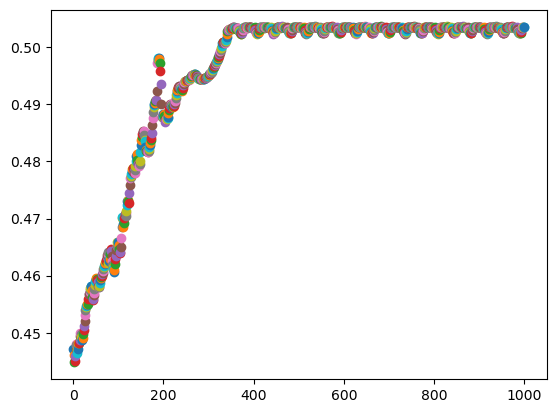

In [22]:
a = lstm_tool.plot_tree([all_trained], X[0:60].reshape(1, 60, 21), 1, 1000, True)

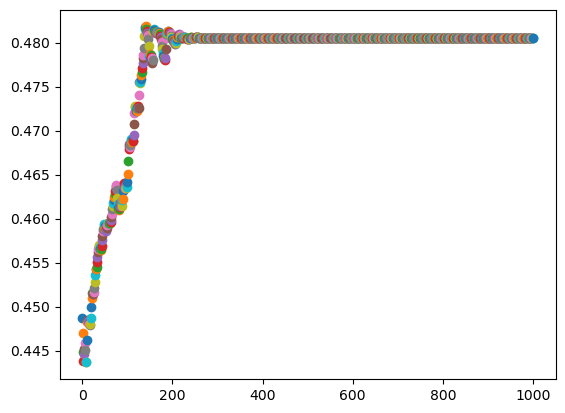

In [23]:
h = lstm_tool.plot_tree([half_trained], X[0:60].reshape(1, 60, 21), 1, 1000, True)

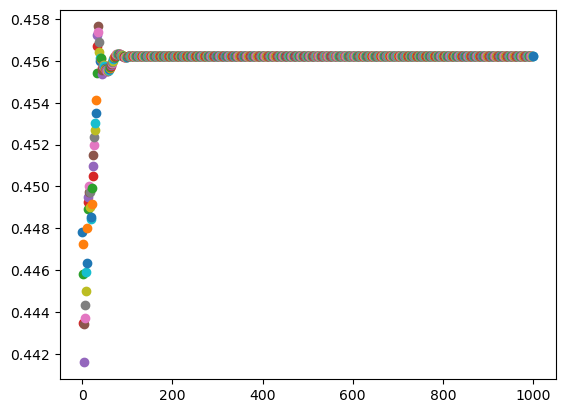

In [19]:
q = lstm_tool.plot_tree([quater_trained], X[0:60].reshape(1, 60, 21), 1, 1000, True)

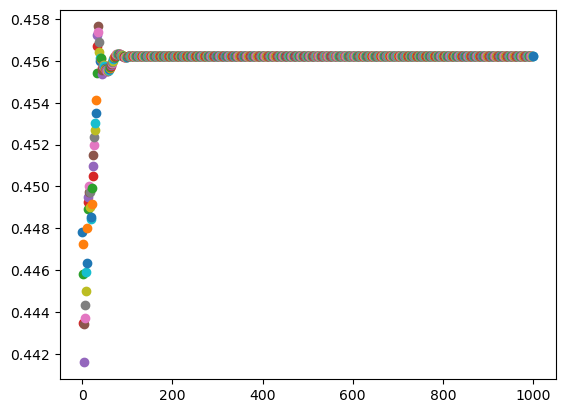

In [37]:
b = lstm_tool.plot_tree([quater_trained], X[0:60].reshape(1, 60, 21), 1, 1000, True)

In [20]:
checker = tf.keras.models.load_model('./model/all_checker.h5')

In [ ]:
print(checker(a[0:431].reshape(1, 431, 21)))
print(checker(h[0:431].reshape(1, 431, 21)))
print(checker(q[0:431].reshape(1, 431, 21)))
print(checker(b[0:431].reshape(1, 431, 21)))

tf.Tensor([[0.9999991]], shape=(1, 1), dtype=float32)
tf.Tensor([[2.927341e-06]], shape=(1, 1), dtype=float32)
tf.Tensor([[2.453275e-06]], shape=(1, 1), dtype=float32)


In [35]:
for i in range(569):
    c = float(checker(b[i:431+i].reshape(1, 431, 21)))

    if c < 0.9:
        print(i, c)

    if i % 100 == 0:
        print(i)

0 2.4532751012884546e-06
0
1 2.4532728275517e-06
2 2.4532728275517e-06
3 2.4532751012884546e-06
4 2.4532751012884546e-06
5 2.4532751012884546e-06
6 2.4532751012884546e-06
7 2.4532751012884546e-06
8 2.4532728275517e-06
9 2.4532751012884546e-06
10 2.4532728275517e-06
11 2.4532728275517e-06
12 2.4532728275517e-06
13 2.4532728275517e-06
14 2.4532751012884546e-06
15 2.4532751012884546e-06
16 2.4532728275517e-06
17 2.4532751012884546e-06
18 2.4532751012884546e-06
19 2.4532728275517e-06
20 2.4532728275517e-06
21 2.4532751012884546e-06
22 2.4532751012884546e-06
23 2.4532751012884546e-06
24 2.4532751012884546e-06
25 2.4532751012884546e-06
26 2.4532751012884546e-06
27 2.4532751012884546e-06
28 2.4532728275517e-06
29 2.4532751012884546e-06
30 2.4532728275517e-06
31 2.4532728275517e-06
32 2.4532728275517e-06
33 2.4532728275517e-06
34 2.4532728275517e-06
35 2.4532728275517e-06
36 2.4532728275517e-06
37 2.4532751012884546e-06
38 2.4532751012884546e-06
39 2.4532728275517e-06
40 2.4532728275517e-06
41

KeyboardInterrupt: 

In [29]:
i

165